<img src="ocns-logo.png">  

<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">CNS Satellite Tutorial</h3>
<h3 align="center">July 1, 2021</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.stats as st

### Brain Observatory Setup

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# drive_path = '/data/allen-brain-observatory/visual-coding-2p'
# manifest_file = os.path.join(drive_path,'manifest.json')

manifest_file = r'/Users/saskiad/Code/brain_observatory/manifest_v1point3.json'

boc = BrainObservatoryCache(manifest_file=manifest_file)

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Getting oriented to the dataset</h1>

</div>

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset - the conditions under which each experiment was acquired. It also allows us to access those data, once we select what we want to use.

Let's take a look at the available **imaging depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory 2P dataset.

Start by getting all the areas, which we call "targeted structures"

In [3]:
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

Use similar functions to get all imaging depths, all cre lines, all reporter lines, all stimuli, and all session types

In [172]:
boc.get_all_imaging_depths()

[175,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [4]:
boc.get_all_cre_lines()

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [4]:
boc.get_all_reporter_lines()

['Ai148(TIT2L-GC6f-ICL-tTA2)',
 'Ai162(TIT2L-GC6s-ICL-tTA2)',
 'Ai93(TITL-GCaMP6f)',
 'Ai93(TITL-GCaMP6f)-hyg',
 'Ai94(TITL-GCaMP6s)']

In [173]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [174]:
boc.get_all_session_types()

['three_session_A', 'three_session_B', 'three_session_C', 'three_session_C2']

### Other boc functions
These "get all X" functions return the unique values for key experiment parameters. We can use these parameters to find experiments of interest and use other boc functions to get those data.

### 1.1 Experiment containers & sessions

The <b>experiment container</b> describes a set of 3 imaging sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Choose a visual area and Cre line from the lists above. Find all the experiment containers for this area and Cre line
</div>

In [5]:
exps = boc.get_experiment_containers(
                    targeted_structures=['VISp'], 
                    cre_lines=['Cux2-CreERT2'])

<b>get_experiment_containers</b> returns a list of experiment containers that meets the conditions we have specified. If we don't pass any parameters, it returns all experiment containers. 

In [12]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
1,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False
2,511509529,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
3,511507650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],False
4,511510699,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),225037,Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],False
5,702934962,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],False
6,645413757,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),348262,Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],False
7,659767480,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),360565,Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],False
8,511510650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
9,712178509,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),390323,Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],False


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.
</div>

In [9]:
experiment_container_id = exps[0]['id']

In [10]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

<b>get_ophys_experiments</b> returns a list of <b>imaging sessions</b> for the conditions that we specified (in this case we passed a single experiment container id). If we don't pass any parameters, it returns all imaging sessions. What other keywords can we use to select imaging sessions?

In [11]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's get the id for the imaging session for the session in this experiment container that has the natural scenes stimulus
</div>

In [14]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                       stimuli=['natural_scenes'])[0]['id']

In [15]:
print(session_id)

501559087


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Getting data for an experiment</h1>


</div>

<b>get_ophys_experiment_data</b> returns the data object giving us access to everything in the NWB file for a single imaging session. If this is the first time you are accessing this file, it can take a few minutes to download.

In [16]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

### 2.1 Maximum projection
This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

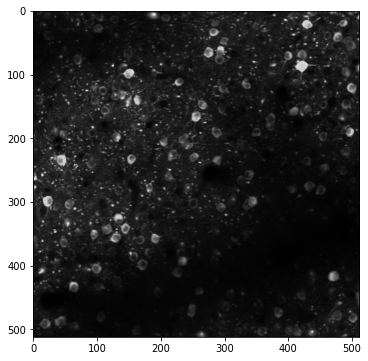

In [17]:
max_projection = data_set.get_max_projection()

fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

### 2.2 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [41]:
rois = data_set.get_roi_mask_array()

What is the shape of this array? How many neurons are in this experiment?

In [42]:
rois.shape

(174, 512, 512)

In [43]:
print(rois.shape[0])

174


Plot the masks for all the ROIs.

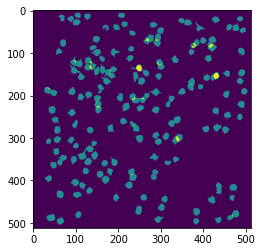

In [44]:
plt.imshow(rois.sum(axis=0))

### 2.3 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

In [27]:
ts, dff = data_set.get_dff_traces()

In [20]:
dff.shape

(174, 113888)

Let's look at the first neuron

Text(0, 0.5, 'DFF (%)')

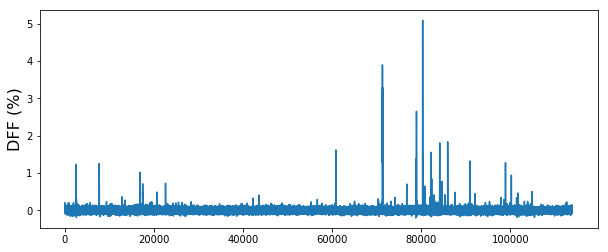

In [24]:
plt.figure(figsize=(10,4))

plt.plot(dff[0,:])

plt.ylabel("DFF (%)", fontsize=16)

Let's look at the first 50 cells. 

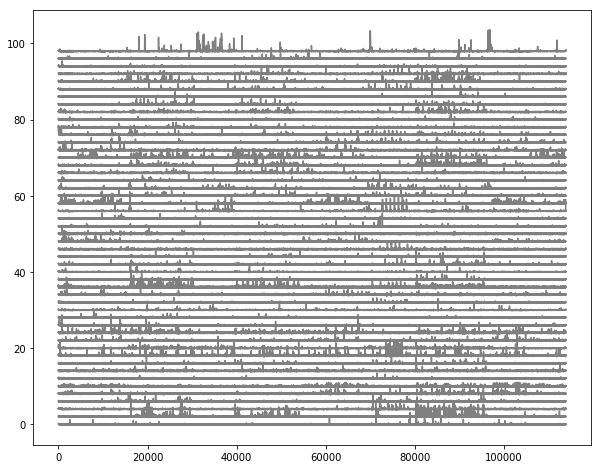

In [25]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

It looks like different cells are active at different times. What could that be about?

### 2.4 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs


Get the stimulus epoch table from data_set and print the table

In [18]:
stim_epoch = data_set.get_stimulus_epoch_table()

stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


Overlay stimulus epochs on the DFF traces.  

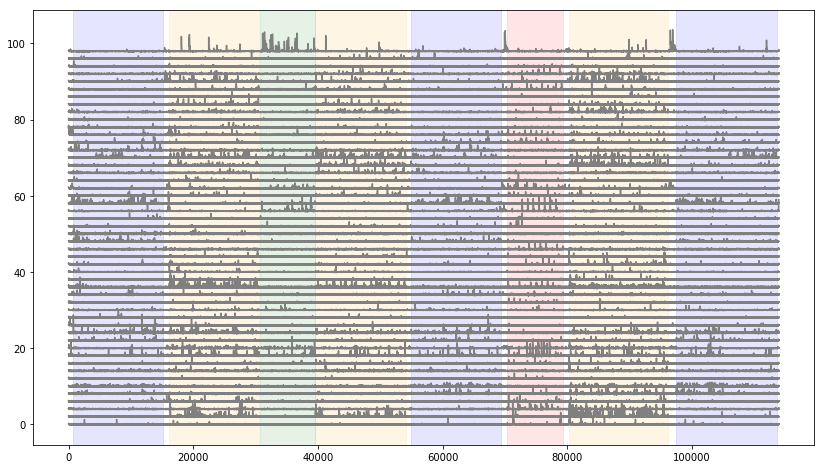

In [28]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.5 Running speed

The running speed of the animal on the rotating disk during the entire session.

Text(0, 0.5, 'Running speed (cm/s)')

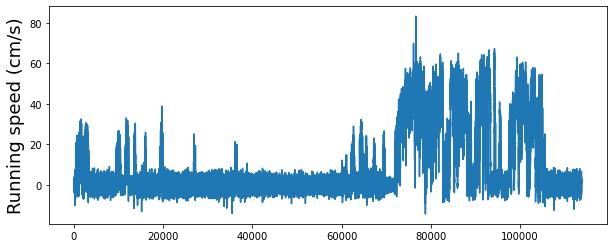

In [20]:
dxcm, tsd = data_set.get_running_speed()

plt.figure(figsize=(10,4))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)", fontsize=18)

Add the running speed to the neural activity and stimulus epoch figure

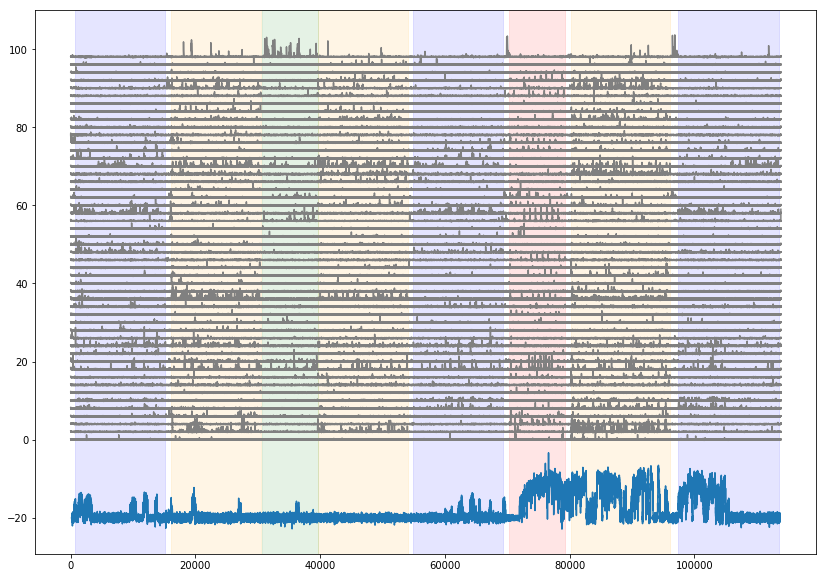

In [31]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### Interesting things

There are some interesting neurons here.  Plot the dff trace for neuron 49 with the stimulus epochs, and running trace. Repeat for neuron 4. And for neuron 35.  What is intereating about these neurons

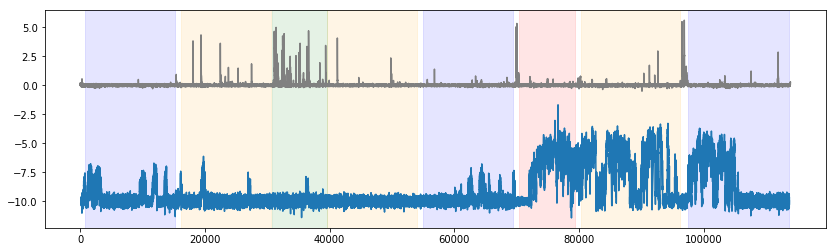

In [36]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[49,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

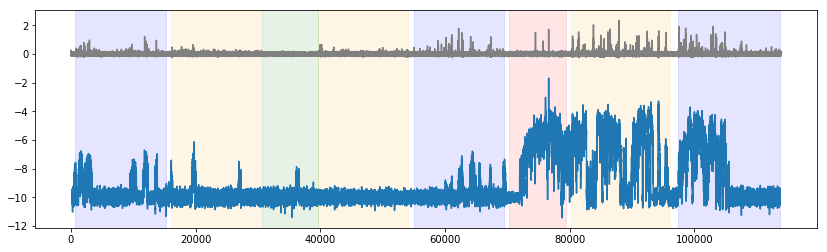

In [39]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[4,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

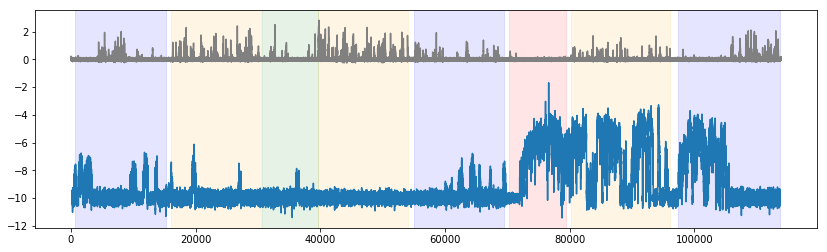

In [40]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[35,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.5b Extracted events
As of the October 2018 data release, we are providing access to events extracted from the DFF traces using the L0 method developed by Sean Jewell and Daniella Witten. These are not stored in the NWB file, thus aren't a function of the data_set object, but are available through the boc

In [41]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

In [42]:
events.shape

(174, 113888)

Plot the events and the dff trace for one neurons (say neuron 1). Zoom in to a relevant portion.

(20000, 21000)

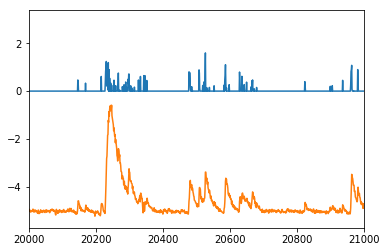

In [48]:
plt.plot(2*events[1,:])
plt.plot(dff[1,:]-5)
plt.xlim(20000,21000)

Remake our plot of neural activty, stimulus, and running using events

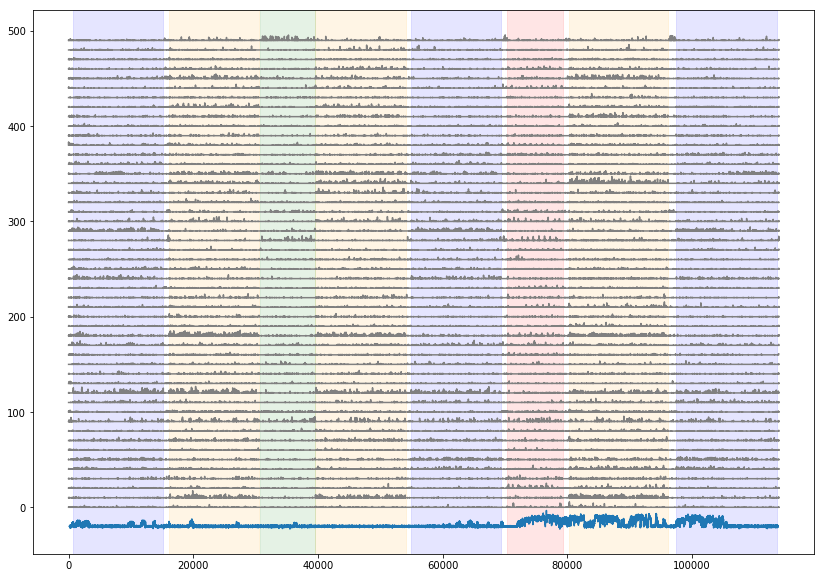

In [51]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(5*(events[i,:]+(i*2)), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.6 Stimulus Table
For each stimulus there is a stimulus table with information about the condition and timing of each trial. 

In [21]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


Get the stimulus table for static gratings. Print the top of this dataframe. What are the parameters for this stimulus?

In [22]:
static_gratings_table = data_set.get_stimulus_table('static_gratings')

static_gratings_table.head()

,orientation,spatial_frequency,phase,start,end
0,90.0,0.04,0.50,747,754
1,150.0,0.04,0.50,754,761
2,30.0,0.02,0.00,762,769
3,0.0,0.32,0.50,769,776
4,150.0,0.16,0.75,777,784


### 2.7 Stimulus Template

The images and movies presented during the session area also included in the NWB file as the <b>stimulus template</b>. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [24]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [57]:
natural_scene_template.shape

(118, 918, 1174)

Plot the image shown that is image # 101

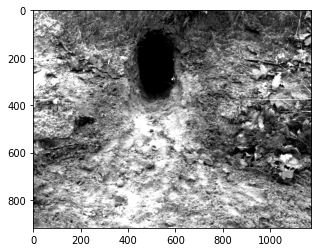

In [25]:
scene_number = 101
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

Use the stimulus table to plot the responses of cell index 1 to image 101

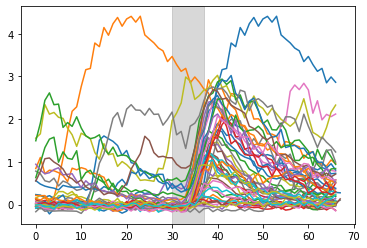

In [28]:
scene_number = 101
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]

cell_index = 1
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-30:stim_subset.end.iloc[i]+30])

plt.axvspan(30,37, color='gray',alpha=0.3)

### 2.8 Metadata
This includes metadata about the experiment, some of which we used to select this experiment, some of which is only included here.

In [60]:
data_set.get_metadata()

{'sex': 'male',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 501559087,
 'experiment_container_id': 511510736,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': 'three_session_B',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'cre_line': 'Cux2-CreERT2/wt',
 'imaging_depth_um': 175,
 'age_days': 104,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

Metadata includes: age, sex, device & device_name, genotype, start_time.  Note: start_time is not the time the experiment was collected, but rather the time the NWB file was created.  We are hoping to fix this soon.  :(

### 2.9 Cell ids and indices

Each cell in the dataset has a unique id, called the cell specimen id. To find the cells in this session, get the cell specimen ids. This id can be used to find experiments/session for a specified cell. It is also valuable for finding the matched cell across sessions for the same experiment container (e.g. if you want to compare a cell's response to drifting gratings with its response the natural scenes). 

In [61]:
cell_ids = data_set.get_cell_specimen_ids()

In [62]:
cell_ids

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

Within each individual session, a cell id is associated with an index. This index maps into the dff array and the roi mask array, etc.  Pick one cell id from the list above and find the index for that cell. Look for the cell specimen indices.

In [63]:
data_set.get_cell_specimen_indices([517473110])

[110]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1>Part 3: Compute the signal correlations as a function of distance between neurons</h1>



</div>

Compute the mean response for each neuron in the experiment for each image of the natural scene stimulus

In [33]:
number_cells = dff.shape[0]
number_images = natural_scene_template.shape[0]
response = np.empty((number_cells, number_images))
for cell_index in range(number_cells):
    for j in range(number_images):
        stim_subset = natural_scene_table[natural_scene_table.frame==j]
        temp = np.empty((len(stim_subset), 15))
        for i in range(len(stim_subset)):
            temp[i,:] = dff[cell_index,stim_subset.start.iloc[i]:stim_subset.start.iloc[i]+15]
        response[cell_index, j] = temp.mean()

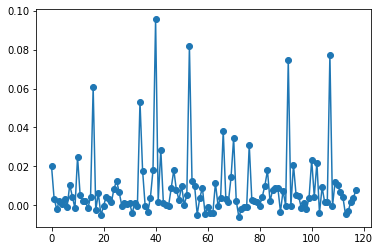

In [56]:
plt.plot(response[0,:], 'o-')

Compute the signal correlation between all neuron pairs. This is the correlation of the mean response to all images

In [38]:
sc = np.empty((number_cells, number_cells))
for i in range(number_cells):
    for j in range(number_cells):
        r,p = st.pearsonr(response[i,:], response[j,:])
        sc[i,j] = r

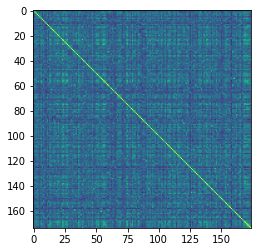

In [39]:
plt.imshow(sc)

Use the ROI masks to calculate the distance between each pair of neurons

In [45]:
loc_x = np.zeros((number_cells))
loc_y = np.zeros((number_cells))

for i in range(number_cells):
    ind = np.where(rois[i])
    loc_x[i] = np.mean(ind[1])
    loc_y[i] = np.mean(ind[0])

distance = np.zeros((number_cells, number_cells))
for i in range(number_cells):
    for j in range(number_cells):
        distance[i, j] = np.sqrt( (loc_x[i]-loc_x[j])**2 + (loc_y[i]-loc_y[j])**2 )

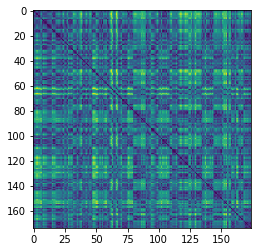

In [46]:
plt.imshow(distance)

Plot the signal correlations as a function of distance of each pair of neurons

Text(0, 0.5, 'Signal correlation')

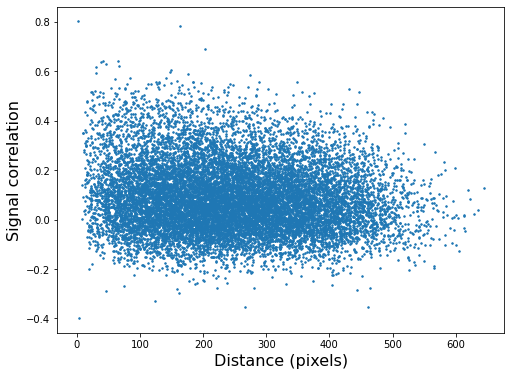

In [58]:
#only use the upper half of the matrix
inds = np.triu_indices(number_cells, k=1)

plt.figure(figsize=(8,6))
plt.plot(distance[inds[0], inds[1]], sc[inds[0], inds[1]], '.', markersize=3.)
plt.xlabel("Distance (pixels)", fontsize=16)
plt.ylabel("Signal correlation", fontsize=16)

## Conclusion

The Allen Brain Observatory 2-photon dataset is a rich dataset that allows you to explore single cell and population responses across 6 cortical areas, 4 cortical layers, 14 transgenic Cre lines to a range of different visual stimuli. This tutorial should enable you to get started in using these data including finding experiments and accessing the neural and behavioral data, along with stimulus information. 

You can find additional documentation on the [dataset and experimental procedures](http://help.brain-map.org/display/observatory/Documentation) as well as on the [AllenSDK](https://allensdk.readthedocs.io/en/latest/brain_observatory.html). If you have any questions, please use our [community forum](https://community.brain-map.org/) to reach us. 
